# Statement

A companhia de seguros Proteja Seu Amanhã quer resolver algumas tarefas com a ajuda de aprendizado de máquina e você precisa avaliar a possibilidade de fazê-lo.

- Tarefa 1: Encontrar clientes semelhantes a um determinado cliente. Isso vai ajudar os agentes da empresa com tarefas de marketing.
- Tarefa 2: Predizer se um novo cliente provavelmente receberá um pagamento de seguro. Um modelo de predição pode ser melhor do que um modelo dummy?
- Tarefa 3: Predizer o número de pagamentos de seguro que um novo cliente provavelmente receberá usando um modelo de regressão linear.
- Tarefa 4: Proteger os dados pessoais dos clientes sem estragar o modelo da tarefa anterior. É necessário desenvolver um algoritmo de transformação de dados que tornaria difícil recuperar informações pessoais se os dados caíssem nas mãos erradas. Isso é chamado de mascaramento de dados ou ofuscação de dados. Mas os dados devem ser protegidos de forma que a qualidade dos modelos de aprendizado de máquina não piore. Você não precisa escolher o melhor modelo, só prove que o algoritmo funciona corretamente.

# Pré-processamento de dados & Exploração

## Inicialização

In [ ]:
import numpy as np
import pandas as pd
import math

import seaborn as sns

import sklearn.metrics
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier


## Carregar Dados

Carregue os dados e faça uma verificação básica de que estão livres de problemas óbvios.

In [3]:
df = pd.read_csv('datasets/insurance_us.csv')


Renomeamos as colunas para tornar o código mais consistente com seu estilo.

In [18]:
df = df.rename(
    columns={
        "Gender": "gender",
        "Age": "age",
        "Salary": "income",
        "Family members": "family_members",
        "Insurance benefits": "insurance_benefits",
    }
)


In [5]:
df.sample(10)


,gender,age,income,family_members,insurance_benefits
4395,0,19.0,62300.0,3,0
1377,0,26.0,46400.0,0,0
1581,0,24.0,57400.0,1,0
678,1,33.0,40900.0,1,0
613,1,32.0,28200.0,0,0
4053,1,19.0,31700.0,1,0
2485,0,34.0,18800.0,1,0
65,1,18.0,35400.0,2,0
4847,0,43.0,36600.0,1,1
4032,0,41.0,39400.0,1,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# podemos querer corrigir o tipo de idade (de float para int), embora isso não seja crítico

# escreva sua conversão aqui se você escolher:
df['age'] = df['age'].astype(int)


In [8]:
# verifique se a conversão foi bem-sucedida
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# agora dê uma olhada nas estatísticas descritivas dos dados.
# Parece que está tudo bem?


In [10]:
df.describe()


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


## AED

Vamos verificar rapidamente se existem determinados grupos de clientes observando o gráfico de pares.

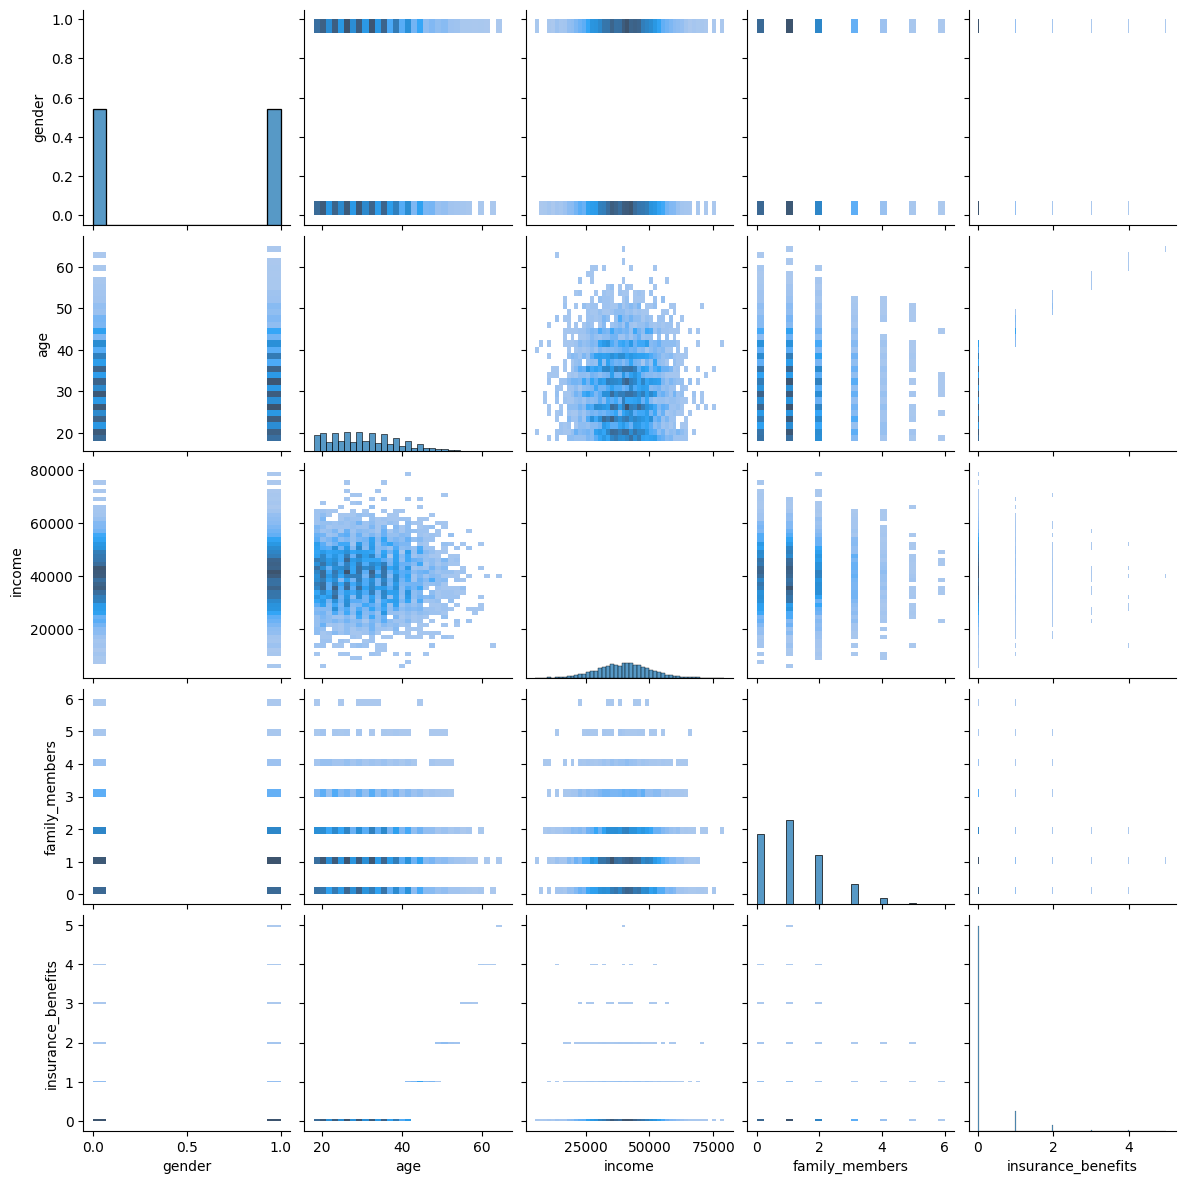

In [ ]:
g = sns.pairplot(df, kind="hist")
g.fig.set_size_inches(12, 12)


Ok, é um pouco difícil identificar grupos óbvios (clusters), pois é difícil combinar várias variáveis simultaneamente (para analisar distribuições multivariadas). É aí que Álgebra Linear e Aprendizado de Máquina podem ser bastante úteis.

# Tarefa 1. Clientes Similares

Na linguagem de AM, é necessário desenvolver um procedimento que retorne k vizinhos mais próximos (objetos) para um determinado objeto com base na distância entre os objetos.

Você pode querer rever as seguintes lições (capítulo -> lição)
- Distância Entre Vetores -> Distância Euclidiana
- Distância Entre Vetores -> Distância de Manhattan

Para resolver a tarefa, podemos tentar diferentes métricas de distância.

Escreva uma função que retorne k vizinhos mais próximos para um n-ésimo objeto com base em uma métrica de distância especificada. O número de pagamentos de seguro recebidos não deve ser levado em consideração para esta tarefa. 

Você pode usar uma implementação pronta do algoritmo kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) ou usar a sua própria.

Teste-o para quatro combinações de dois casos
- Escalabilidade
  - os dados não são escalados
  - os dados escalados com o escalonador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Métricas de distância
  - Euclidiana
  - Manhattan

Responda às perguntas:
- Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?
-Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?

In [ ]:
feature_names = ["gender", "age", "income", "family_members"]


In [17]:
def get_knn(df, n, k, metric):
    """
    Retorna os vizinhos mais próximos de k

    :param df: DataFrame pandas usado para encontrar objetos semelhantes dentro de
    :param n: número do objeto pelo qual os vizinhos mais próximos são procurados
    :param k: o número dos vizinhos mais próximos a serem retornados
    :param metric: nome da métrica de distância
    """

    nbrs = NearestNeighbors(metric=metric)
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors(
        [df.iloc[n][feature_names]], k, return_distance=True
    )

    df_res = pd.concat(
        [
            df.iloc[nbrs_indices[0]],
            pd.DataFrame(
                nbrs_distances.T, index=nbrs_indices[0], columns=["distance"]
            ),
        ],
        axis=1,
    )

    return df_res


Escalando os dados

In [16]:
feature_names = ["gender", "age", "income", "family_members"]

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(
    df[feature_names].to_numpy()
)

df_scaled = df.copy()
df_scaled[feature_names] = transformer_mas.transform(
    df[feature_names].to_numpy()
)


In [15]:
df_scaled.sample(5)


,gender,age,income,family_members,insurance_benefits
2314,1,0.523077,0.591139,0.166667,0
3583,1,0.276923,0.545570,0.000000,0
2490,0,0.307692,0.531646,0.000000,0
1968,1,0.523077,0.535443,0.166667,0
4411,1,0.338462,0.512658,0.166667,0


Agora, vamos obter registros semelhantes para um determinado registro para cada combinação

In [ ]:
get_knn(df, 0, 5, 'euclidean')


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600.0,1,0,0.000000
2022,1,41,49600.0,0,0,1.000000
1225,0,42,49600.0,0,1,1.732051
4031,1,44,49600.0,2,1,3.162278
3424,0,38,49600.0,0,0,3.316625


In [ ]:
get_knn(df, 0, 5, 'manhattan')


,gender,age,income,family_members,insurance_benefits,distance
0,1,41,49600.0,1,0,0.0
2022,1,41,49600.0,0,0,1.0
1225,0,42,49600.0,0,1,3.0
4031,1,44,49600.0,2,1,4.0
3424,0,38,49600.0,0,0,5.0


In [ ]:
get_knn(df_scaled, 0, 5, 'euclidean')


,gender,age,income,family_members,insurance_benefits,distance
0,1.0,0.630769,0.627848,0.166667,0,0.000000
2689,1.0,0.630769,0.634177,0.166667,0,0.006329
133,1.0,0.615385,0.636709,0.166667,0,0.017754
4869,1.0,0.646154,0.637975,0.166667,1,0.018418
3275,1.0,0.646154,0.651899,0.166667,1,0.028550


In [ ]:
get_knn(df_scaled, 0, 5, 'manhattan')


,gender,age,income,family_members,insurance_benefits,distance
0,1.0,0.630769,0.627848,0.166667,0,0.000000
2689,1.0,0.630769,0.634177,0.166667,0,0.006329
133,1.0,0.615385,0.636709,0.166667,0,0.024245
4869,1.0,0.646154,0.637975,0.166667,1,0.025511
3365,1.0,0.630769,0.596203,0.166667,0,0.031646


Respostas para as perguntas

**Os dados não escalados afetam o algoritmo kNN? Se sim, como isso acontece?** 

*Sim, os dados não escalados afetam o algoritmo kNN. Quando os dados não são escalados, as características com maiores magnitudes podem dominar a distância calculada, o que pode levar a resultados distorcidos na identificação dos vizinhos mais próximos. Isso significa que as características com valores maiores terão mais influência na determinação da similaridade entre os registros, enquanto as características com valores menores podem ser negligenciadas. Ao escalar os dados, todas as características são trazidas para uma escala comum, permitindo que cada característica contribua igualmente para o cálculo da distância e melhorando a precisão do algoritmo kNN.*

**Quão semelhantes são os resultados usando a métrica de distância de Manhattan (independentemente da escalabilidade)?** 

*Os resultados usando a métrica de distância de Manhattan podem ser diferentes dos resultados obtidos com a métrica Euclidiana, independentemente da escalabilidade dos dados. A distância de Manhattan calcula a soma das diferenças absolutas entre as coordenadas dos pontos, enquanto a distância Euclidiana calcula a raiz quadrada da soma dos quadrados das diferenças. Isso pode levar a diferentes conjuntos de vizinhos mais próximos, especialmente em espaços de alta dimensão ou quando as características têm distribuições diferentes.*

# Tarefa 2. É provável que o cliente receba um pagamento do seguro?

Em termos de aprendizado de máquina, podemos olhar para isso como uma tarefa de classificação binária.

Com os pagamentos de seguro sendo mais do que zero como objetivo, avalie se a abordagem da classificação kNN pode ser melhor do que um modelo dummy.

Instruções:
- Construa um classificador baseado em kNN e meça sua qualidade com a métrica F1 para k=1..10 tanto para os dados originais quanto para os escalados. Seria interessante ver como k pode influenciar a métrica de avaliação e se a escalabilidade dos dados faz alguma diferença. Você pode usar uma implementação pronta do algoritmo de classificação kNN do scikit-learn (verifique [o link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) ou usar a sua própria.
- Construa o modelo dummy, que é aleatório para este caso. Deve retornar com alguma probabilidade o valor "1". Vamos testar o modelo com quatro valores de probabilidade: 0, a probabilidade de fazer qualquer pagamento de seguro, 0,5, 1.

A probabilidade de fazer qualquer pagamento de seguro pode ser definida como

$$
P\{\text{pagamento de seguro recebido}\} = \frac{\text{número de clientes que receberam qualquer pagamento de seguro}}{\text{número total de clientes}}
$$

Divida os dados inteiros na proporção 70:30 para as partes de treinamento/teste.

In [24]:
# calcule a meta

df["insurance_benefits_received"] = df["insurance_benefits"].apply(
    lambda x: 1 if x > 0 else 0
)
print(df["insurance_benefits_received"])


0       0
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: insurance_benefits_received, Length: 5000, dtype: int64


In [20]:
# verifique o desequilíbrio de classe com value_counts()

print(df.value_counts())


gender  age  income   family_members  insurance_benefits  insurance_benefits_received
0       21   37200.0  0               0                   0                              3
        25   45900.0  1               0                   0                              3
        31   49400.0  1               0                   0                              3
        28   39800.0  1               0                   0                              3
1       19   43200.0  1               0                   0                              3
                                                                                        ..
        59   29600.0  0               4                   1                              1
             32100.0  0               4                   1                              1
             51700.0  2               4                   1                              1
        61   39600.0  1               4                   1                              1
    

In [25]:
def eval_classifier(y_true, y_pred):
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f"F1: {f1_score:.2f}")

    # se você tiver um problema com a linha a seguir, reinicie o kernel e execute o caderno novamente
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize="all")
    print("Matriz de Confusão")
    print(cm)


In [26]:
# gerando saída de um modelo aleatório
def rnd_model_predict(P, size, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)


In [27]:
for P in [0, df["insurance_benefits_received"].sum() / len(df), 0.5, 1]:
    print(f"A probabilidade: {P:.2f}")
    y_pred_rnd = rnd_model_predict(P, len(df))

    eval_classifier(df["insurance_benefits_received"], y_pred_rnd)

    print()


A probabilidade: 0.00
F1: 0.00
Matriz de Confusão
[[0.8872 0.    ]
 [0.1128 0.    ]]

A probabilidade: 0.11
F1: 0.12
Matriz de Confusão
[[0.7914 0.0958]
 [0.0994 0.0134]]

A probabilidade: 0.50
F1: 0.20
Matriz de Confusão
[[0.456  0.4312]
 [0.053  0.0598]]

A probabilidade: 1.00
F1: 0.20
Matriz de Confusão
[[0.     0.8872]
 [0.     0.1128]]



In [28]:
features = df.drop(
    columns=["insurance_benefits_received", "insurance_benefits"]
)
target = df["insurance_benefits_received"]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345
)


for k in range(1, 11):
    print(f"k = {k}")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    eval_classifier(target_valid, predictions)
    print()


k = 1
F1: 0.60
Matriz de Confusão
[[0.87066667 0.02066667]
 [0.05266667 0.056     ]]

k = 2
F1: 0.41
Matriz de Confusão
[[0.88733333 0.004     ]
 [0.08       0.02866667]]

k = 3
F1: 0.41
Matriz de Confusão
[[0.87933333 0.012     ]
 [0.078      0.03066667]]

k = 4
F1: 0.28
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.09066667 0.018     ]]

k = 5
F1: 0.27
Matriz de Confusão
[[0.88533333 0.006     ]
 [0.09066667 0.018     ]]

k = 6
F1: 0.11
Matriz de Confusão
[[0.89       0.00133333]
 [0.102      0.00666667]]

k = 7
F1: 0.11
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.102      0.00666667]]

k = 8
F1: 0.07
Matriz de Confusão
[[0.89133333 0.        ]
 [0.10466667 0.004     ]]

k = 9
F1: 0.08
Matriz de Confusão
[[0.89133333 0.        ]
 [0.104      0.00466667]]

k = 10
F1: 0.00
Matriz de Confusão
[[0.89133333 0.        ]
 [0.10866667 0.        ]]



In [29]:
df_scaled["insurance_benefits_received"] = df_scaled[
    "insurance_benefits"
].apply(lambda x: 1 if x > 0 else 0)
features = df_scaled.drop(
    columns=["insurance_benefits_received", "insurance_benefits"]
)
target = df_scaled["insurance_benefits_received"]

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345
)


for k in range(1, 11):
    print(f"k = {k}")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    eval_classifier(target_valid, predictions)
    print()


k = 1
F1: 0.97
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.00466667 0.104     ]]

k = 2
F1: 0.93
Matriz de Confusão
[[8.90666667e-01 6.66666667e-04]
 [1.40000000e-02 9.46666667e-02]]

k = 3
F1: 0.95
Matriz de Confusão
[[0.88933333 0.002     ]
 [0.00866667 0.1       ]]

k = 4
F1: 0.91
Matriz de Confusão
[[0.88933333 0.002     ]
 [0.01666667 0.092     ]]

k = 5
F1: 0.92
Matriz de Confusão
[[0.88666667 0.00466667]
 [0.01133333 0.09733333]]

k = 6
F1: 0.90
Matriz de Confusão
[[0.89       0.00133333]
 [0.018      0.09066667]]

k = 7
F1: 0.92
Matriz de Confusão
[[0.88733333 0.004     ]
 [0.01266667 0.096     ]]

k = 8
F1: 0.90
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.01733333 0.09133333]]

k = 9
F1: 0.92
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.01466667 0.094     ]]

k = 10
F1: 0.88
Matriz de Confusão
[[0.88866667 0.00266667]
 [0.02133333 0.08733333]]



# Tarefa 3. Regressão (com Regressão Linear)

Com os pagamentos de seguro como objetivo, avalie qual seria o REQM para um modelo de Regressão Linear.

Construa sua própria implementação de Regressão Linear. Para isso, lembre-se de como a solução da tarefa de regressão linear é formulada em termos de Álgebra linear. Verifique o REQM para os dados originais e os escalados. Você pode ver alguma diferença no REQM entre esses dois casos?

Vamos denotar
- $X$ — matriz de características, cada linha é um caso, cada coluna é uma característica, a primeira coluna consiste em unidades
- $y$ — objetivo (um vetor)
- $\hat{y}$ — objetivo estimado (um vetor)
- $w$ — vetor de peso

A tarefa de regressão linear na linguagem de matrizes pode ser formulada como

$$
y = Xw
$$

O objetivo do treinamento, então, é encontrar os $w$ que minimizaria a distância L2 (EQM) entre $Xw$ e $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que há uma solução analítica para a questão acima:

$$
w = (X^T X)^{-1} X^T y
$$

A fórmula acima pode ser usada para encontrar os pesos $w$ e o último pode ser usado para calcular valores preditos

$$
\hat{y} = X_{val}w
$$

Divida todos os dados na proporção 70:30 para as partes de treinamento/validação. Use a métrica REQM para a avaliação do modelo.

In [30]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # somando as unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights

        return y_pred


In [ ]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f"REQM: {rmse:.2f}")

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f"R2: {r2_score:.2f}")


In [ ]:
X = df[["age", "gender", "income", "family_members"]].to_numpy()
y = df["insurance_benefits"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


In [ ]:
X = df_scaled[["age", "gender", "income", "family_members"]].to_numpy()
y = df_scaled["insurance_benefits"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
REQM: 0.34
R2: 0.66


# Tarefa 4. Ofuscando dados

É melhor ofuscar os dados multiplicando as características numéricas (lembre-se, elas podem ser vistos como a matriz $X$) por uma matriz invertível $P$. 

$$
X' = X \times P
$$

Tente fazer isso e verifique como os valores das características ficarão após a transformação. Aliás, a invertibilidade é importante aqui, portanto, certifique-se de que $P$ seja realmente invertível.

Você pode querer revisar a lição 'Matrizes e Operações com Matrizes -> Multiplicação de Matrizes' para relembrar a regra de multiplicação de matrizes e sua implementação com NumPy.

In [32]:
personal_info_column_list = ["gender", "age", "income", "family_members"]
df_pn = df[personal_info_column_list]


In [33]:
X = df_pn.to_numpy()


Gerando uma matriz $P$ aleatória.

In [34]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
print(P)


[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


Verificando se a matriz $P$ é invertível

In [35]:
P_1 = np.linalg.inv(P)
print(P_1)


[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


Você consegue adivinhar a idade ou a renda dos clientes após a transformação?

Você pode recuperar os dados originais de $X′$ se souber $P$? Tente verificar isso com cálculos movendo $P$ do lado direito da fórmula acima para o esquerdo. As regras da multiplicação de matrizes são realmente úteis aqui

In [36]:
print(X @ P)
print(X)
print(P)


[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]
[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


Imprima todos os três casos para alguns clientes
- Os dados originais
- O transformado
- O invertido (recuperado)

In [37]:
X_original = X[:5]
for i, row in enumerate(X_original):
    formatted_row = [
        f"{val:.0f}" if abs(val) >= 1 else f"{val:.6f}" for val in row
    ]
    print(f"Cliente {i}: {formatted_row}")


Cliente 0: ['1', '41', '49600', '1']
Cliente 1: ['0.000000', '46', '38000', '1']
Cliente 2: ['0.000000', '29', '21000', '0.000000']
Cliente 3: ['0.000000', '21', '41700', '2']
Cliente 4: ['1', '28', '26100', '0.000000']


In [38]:
X_transformados = (X @ P)[:5]

for i, row in enumerate(X_transformados):
    formatted_row = [
        f"{val:.0f}" if abs(val) >= 1 else f"{val:.6f}" for val in row
    ]
    print(f"Cliente {i}: {formatted_row}")


Cliente 0: ['6360', '22380', '18424', '46001']
Cliente 1: ['4873', '17160', '14126', '35253']
Cliente 2: ['2693', '9486', '7809', '19485']
Cliente 3: ['5346', '18803', '15479', '38663']
Cliente 4: ['3347', '11783', '9700', '24211']


In [39]:
X_recuperados = (X @ P @ P_1)[:5]
for i, row in enumerate(X_recuperados):
    formatted_row = [
        f"{val:.0f}" if abs(val) >= 1 else f"{val:.12f}" for val in row
    ]
    print(f"Cliente {i}: {formatted_row}")


Cliente 0: ['0.999999999993', '41', '49600', '1']
Cliente 1: ['-0.000000000004', '46', '38000', '1']
Cliente 2: ['-0.000000000003', '29', '21000', '0.000000000001']
Cliente 3: ['-0.000000000005', '21', '41700', '2']
Cliente 4: ['0.999999999998', '28', '26100', '-0.000000000000']


In [40]:
diferença = X_original - X_recuperados
for i, row in enumerate(diferença):
    formatted_row = [
        f"{val:.0f}" if abs(val) >= 1 else f"{val:.12f}" for val in row
    ]
    print(f"Cliente {i}: {formatted_row}")


Cliente 0: ['0.000000000007', '0.000000000005', '0.000000000000', '-0.000000000004']
Cliente 1: ['0.000000000004', '-0.000000000001', '0.000000000007', '-0.000000000004']
Cliente 2: ['0.000000000003', '0.000000000002', '0.000000000000', '-0.000000000001']
Cliente 3: ['0.000000000005', '0.000000000003', '0.000000000000', '-0.000000000007']
Cliente 4: ['0.000000000002', '0.000000000002', '0.000000000000', '0.000000000000']


In [41]:
print(f"{np.max(np.abs(diferença)):.11f}")


0.00000000001


**Você provavelmente pode ver que alguns valores não são exatamente iguais aos dos dados originais. Qual pode ser a razão disso?**

*Ao multiplicar a matriz original pelos dados de transformação e, em seguida, tentar recuperar os dados originais multiplicando pelo inverso da matriz de transformação, podem ocorrer pequenas diferenças devido a erros numéricos inerentes às operações de ponto flutuante realizadas pelos computadores. Essas operações podem introduzir pequenas imprecisões que se acumulam ao longo das multiplicações, resultando em valores recuperados que não são exatamente iguais aos originais. Além disso, se a matriz de transformação for mal condicionada (ou seja, próxima de singular), isso pode amplificar ainda mais esses erros numéricos durante o processo de recuperação.*



## Provas de que a ofuscação de dados pode funcionar com a Regressão Linear

A tarefa de regressão foi resolvida com regressão linear neste projeto. Sua próxima tarefa é provar analiticamente que o método de ofuscação fornecido não afetará a regressão linear em termos de valores preditos, ou seja, seus valores permanecerão os mesmos. Você acredita nisso? Bem, você não precisa acreditar, você deve provar isso!

Assim, os dados são ofuscados e há $X \ P$ em vez de apenas X agora. Consequentemente, existem outros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Como  $w$ e $w_P$ seriam ligados se você simplificasse a fórmula para $w_P$ acima? 

Quais seriam os valores previstos com $w_P$? 

O que isso significa para a qualidade da regressão linear se você medir com REQM?

Verifique o Apêndice B Propriedades das Matrizes no final do caderno. Existem fórmulas úteis lá!

Nenhum código é necessário nesta seção, apenas explicação analítica!

**Resposta**

Ao simplificar a fórmula para $ w_P $, podemos expandir os termos:
$$
w_P = [(XP)^T XP]^{-1} (XP)^T y = [P^T X^T X P]^{-1} P^T X^T y
$$

Usando a propriedade das matrizes inversas, podemos reescrever o termo inverso:
$$
[P^T X^T X P]^{-1} = P^{-1} (X^T X)^{-1} (P^T)^{-1}
$$

Substituindo isso de volta na expressão para $ w_P $:
$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Portanto, os pesos $ w_P $ são relacionados aos pesos originais $ w $ pela multiplicação pela inversa da matriz de transformação $ P^{-1} $.

**Prova analítica**

Os valores previstos com $ w_P $ seriam:
$$
\hat{y}_P = X_P w_P = X P P^{-1} w = X w = \hat{y}
$$

A qualidade da regressão linear, medida pelo REQM, permaneceria inalterada, pois os valores previstos $ \hat{y}_P $ são iguais aos valores previstos originais $ \hat{y} $. Portanto, a ofuscação dos dados não afeta a capacidade do modelo de regressão linear de fazer previsões precisas.

## Teste de regressão linear com ofuscação de dados

Agora, vamos provar que a Regressão Linear pode funcionar computacionalmente com a transformação de ofuscação escolhida.

Crie um procedimento ou uma classe que execute a Regressão Linear opcionalmente com a ofuscação. Você pode usar uma implementação pronta de Regressão Linear do scikit-learn ou sua própria.

Execute a Regressão Linear para os dados originais e os ofuscados, compare os valores previstos e os valores da métrica $R^2$ do REQM. Há alguma diferença?

**Procedimento**

- Crie uma matriz quadrada $P$ de números aleatórios.
- Verifique se é invertível. Caso contrário, repita o primeiro ponto até obtermos uma matriz invertível.
- Use $XP$ como a nova matriz de características

In [42]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
XP = X @ P
print(XP)


[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]


In [43]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, XP, y):
        # somando as unidades
        X2 = np.append(np.ones([len(XP), 1]), XP, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, XP):
        # somando as unidades
        X2 = np.append(np.ones([len(XP), 1]), XP, axis=1)
        y_pred = X2 @ self.weights

        return y_pred


In [ ]:
def eval_regressor(y_true, y_pred):
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f"REQM: {rmse:.2f}")

    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f"R2: {r2_score:.2f}")


In [ ]:
X = df[["age", "gender", "income", "family_members"]].to_numpy()
y = df["insurance_benefits"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)


[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
REQM: 0.34
R2: 0.66


# Conclusões

1. *Os dados não escalados afetam o algoritmo kNN, pois características com maiores magnitudes podem dominar a distância calculada, levando a resultados distorcidos. A escalabilidade dos dados é crucial para garantir que todas as características contribuam igualmente para o cálculo da distância. Os resultados usando a métrica de distância de Manhattan podem diferir dos obtidos com a métrica Euclidiana, independentemente da escalabilidade dos dados, devido às diferentes formas como essas métricas calculam a distância entre os pontos.*  

2. *Um modelo de predição baseado em kNN pode ser melhor do que um modelo dummy, especialmente quando os dados são escalados adequadamente. O modelo kNN pode capturar padrões nos dados que um modelo dummy aleatório não consegue, resultando em uma melhor métrica F1.*  

3. *A Regressão Linear pode ser eficaz para prever o número de pagamentos de seguro, e a escalabilidade dos dados pode influenciar a precisão do modelo. Dados escalados geralmente levam a melhores resultados, pois evitam que características com maiores magnitudes dominem o modelo.*  

4. *A ofuscação de dados através da multiplicação por uma matriz invertível não afeta a capacidade do modelo de Regressão Linear de fazer previsões precisas. Os valores previstos permanecem os mesmos, e a qualidade do modelo, medida pelo REQM, não é alterada. Isso demonstra que é possível proteger os dados pessoais dos clientes sem comprometer a eficácia do modelo de aprendizado de máquina.*  


# Checklist

Digite 'x' para verificar. Em seguida, pressione Shift + Enter.

- [x]  O Jupyter Notebook está aberto.
- [ ]  O código está livre de erros
- [ ]  As células são organizadas em ordem de lógica e execução
- [ ]  A tarefa 1 foi executada
    - [ ]  Existe o procedimento que pode retornar k clientes semelhantes a um determinado cliente
    - [ ]  O procedimento é testado para todas as quatro combinações propostas
    - [ ]  As perguntas sobre a escala/distâncias são respondidas
- [ ]  A tarefa 2 foi executada
    - [ ]  O modelo de classificação aleatória é construído e testado para todos os níveis de probabilidade
    - [ ]  O modelo de classificação kNN é construído e testado tanto para os dados originais quanto para os escalados, a métrica F1 é calculada.
- [ ]  A tarefa 3 foi executada
    - [ ]  A solução de regressão linear é implementada com operações matriciais.
    - [ ]  O REQM é calculado para a solução implementada.
- [ ]  A tarefa 4 foi executada
    - [ ]  Os dados são ofuscados com uma matriz P aleatória e invertível
    - [ ]  Os dados ofuscados são recuperados, alguns exemplos são impressos
    - [ ]  A prova analítica de que a transformação não afeta o REQM é fornecida
    - [ ]  A prova computacional de que a transformação não afeta o REQM é fornecida
- [ ]  As conclusões foram feitas

# Apêndices

## Apêndice A: Escrevendo Fórmulas em Notebooks Jupyter

Você pode escrever fórmulas em seu Jupyter Notebook em uma linguagem de marcação de texto fornecida por um sistema de publicação de alta qualidade chamado $\LaTeX$ (pronuncia-se "Lah-tech"), e elas se parecerão com fórmulas em livros didáticos.

Para colocar uma fórmula em um texto, coloque o cifrão (\$) antes e depois do texto da fórmula, por exemplo $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Se uma fórmula deve estar em seu próprio parágrafo, coloque o cifrão duplo (\$\$) antes e depois do texto da fórmula, por exemplo

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

A linguagem de marcação do [LaTeX](https://en.wikipedia.org/wiki/LaTeX) é muito popular entre as pessoas que usam fórmulas em seus artigos, livros e textos. Pode ser complexo, mas o básico é fácil. Confira esta [folha de dicas](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) de duas páginas para aprender a compor as fórmulas mais comuns.

## Apêndice B: Propriedades das Matrizes

Matrizes têm muitas propriedades em Álgebra Linear. Algumas delas estão listadas aqui, o que pode ajudar na prova analítica deste projeto.

<table>
<tr>
<td>Distributividade</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Não-comutatividade</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propriedade associativa da multiplicação</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propriedade de identidade multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversividade da transposição de um produto de matrizes,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>